In [1]:
import pandas as pd

In [70]:
df = pd.read_csv('../experiment_results/Topology_size_full_18.06/results.csv')
dfhh = pd.read_csv('../experiment_results/Topology_size_hh_15.06/results.csv')
df_combined = pd.concat([df, dfhh], ignore_index=True)

In [3]:
df = df_combined

In [4]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,300,bacon,bposd,17,17,1000,constant,0.002,0.002,NaN,NaN,NaN
1,custom_full,350,bacon,bposd,17,17,1000,constant,0.002,0.001,NaN,NaN,NaN
2,custom_full,300,bacon,bposd,17,17,1000,modsi1000,0.002,0.014,NaN,NaN,NaN
3,custom_full,400,bacon,bposd,19,19,1000,constant,0.002,0.001,NaN,NaN,NaN
4,custom_full,350,bacon,bposd,17,17,1000,modsi1000,0.002,0.015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.008,0.497,NaN,NaN,NaN
338,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.002,0.485,NaN,NaN,NaN
339,custom_heavyhex,546,color,bposd,13,13,1000,constant,0.004,0.501,NaN,NaN,NaN
340,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.004,0.494,NaN,NaN,NaN


In [59]:
import matplotlib.pyplot as plt

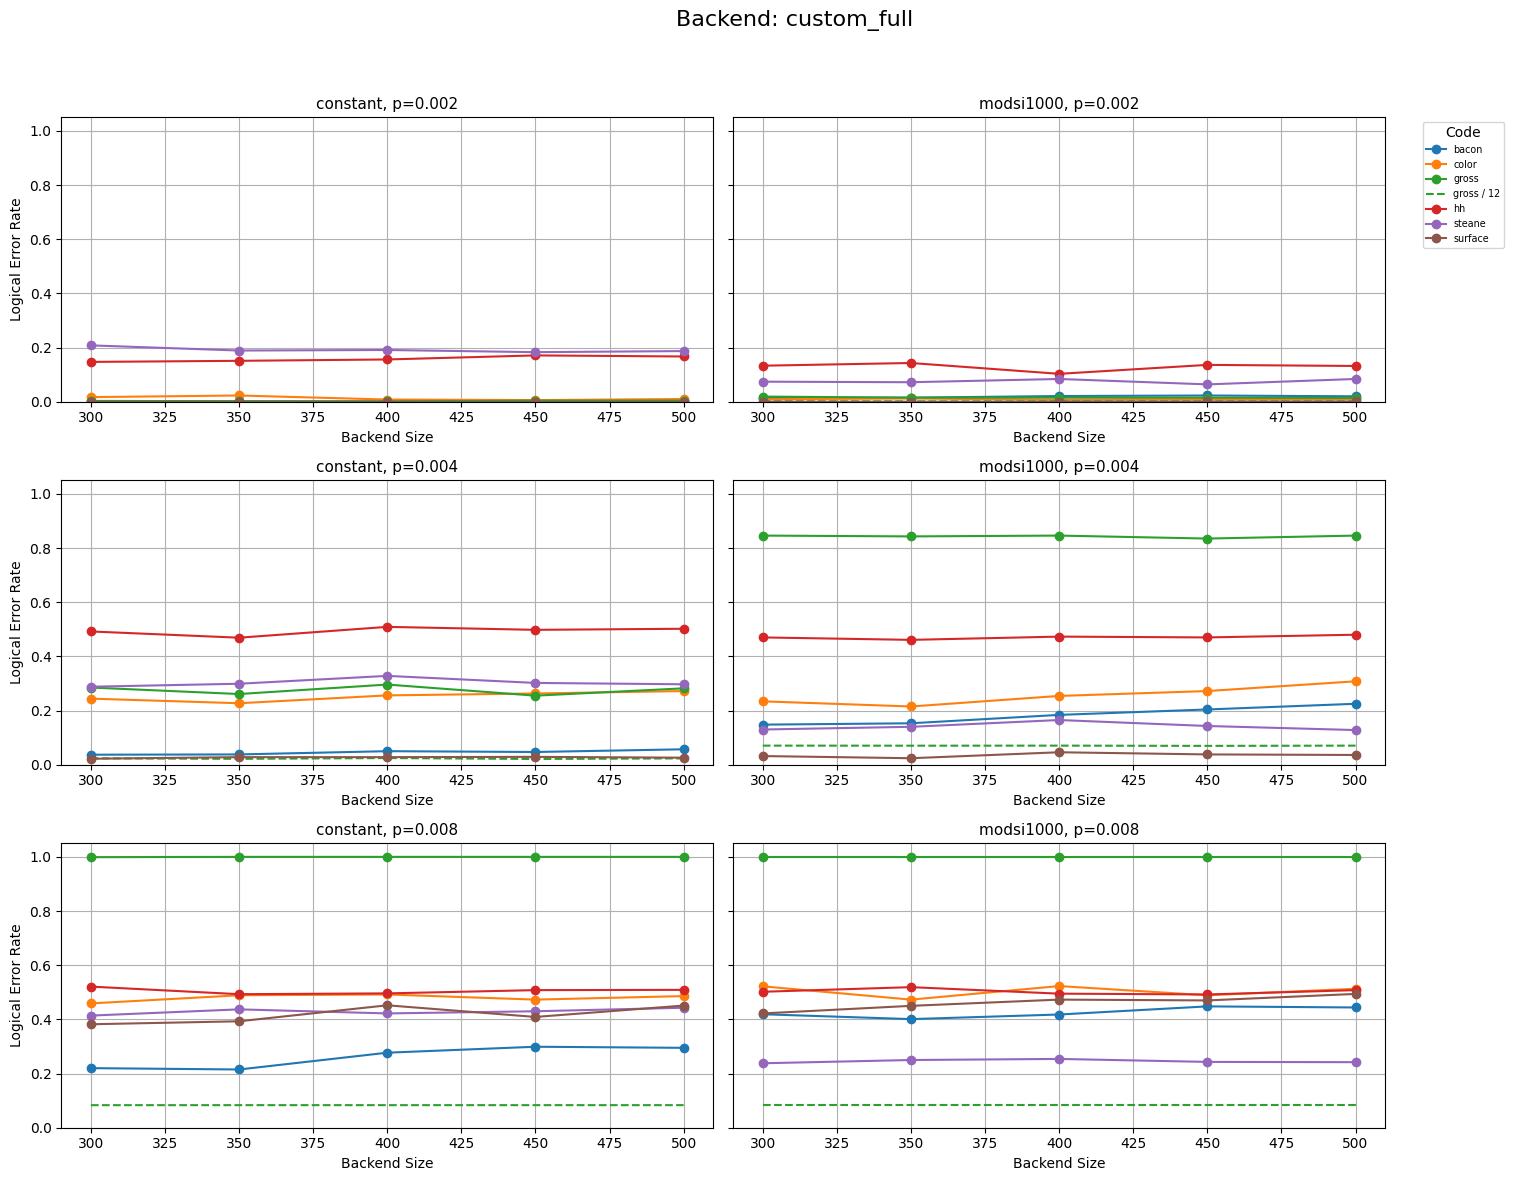

In [71]:
import matplotlib.pyplot as plt

# Error types and probabilities to show
error_types = ['constant', 'modsi1000']
error_probs = [0.002, 0.004, 0.008]

# Filter out heavyhex codes
df_filtered = df[~df['code'].str.contains('heavyhex', case=False, na=False)]
df_filtered = df_filtered[~df_filtered['backend'].str.contains('heavyhex', case=False, na=False)]


# Get unique backends
backends = df_filtered['backend'].unique()

for backend in backends:
    fig, axes = plt.subplots(len(error_probs), len(error_types), figsize=(16, 12), sharey=True)

    fig.suptitle(f'Backend: {backend}', fontsize=16)

    for i, p in enumerate(error_probs):  # rows = error probabilities
        for j, et in enumerate(error_types):  # columns = error types
            ax = axes[i][j]
            subset = df_filtered[
                (df_filtered['backend'] == backend) &
                (df_filtered['error_type'] == et) &
                (df_filtered['error_probability'] == p)
            ]

            for code, group in subset.groupby('code'):
                group_sorted = group.sort_values('backend_size')

                # Plot gross line normally
                if code == 'gross':
                    line = ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                                   label=code, marker='o')
                    line_color = line[0].get_color()

                    # Dashed gross/12 line
                    gross_div12 = group_sorted['logical_error_rate'] / 12
                    ax.plot(group_sorted['backend_size'], gross_div12,
                            linestyle='--', color=line_color, label='gross / 12')
                else:
                    ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                            label=code, marker='o')

            # Titles and labels
            ax.set_title(f'{et}, p={p}', fontsize=11)
            ax.set_xlabel('Backend Size')
            if j == 0:
                ax.set_ylabel('Logical Error Rate')

            ax.grid(True)
            ax.set_ylim(0, 1.05)

            # Add legend only once
            if i == 0 and j == 1:
                ax.legend(title='Code', fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.savefig(f"../data/size/full.png")
    plt.show()




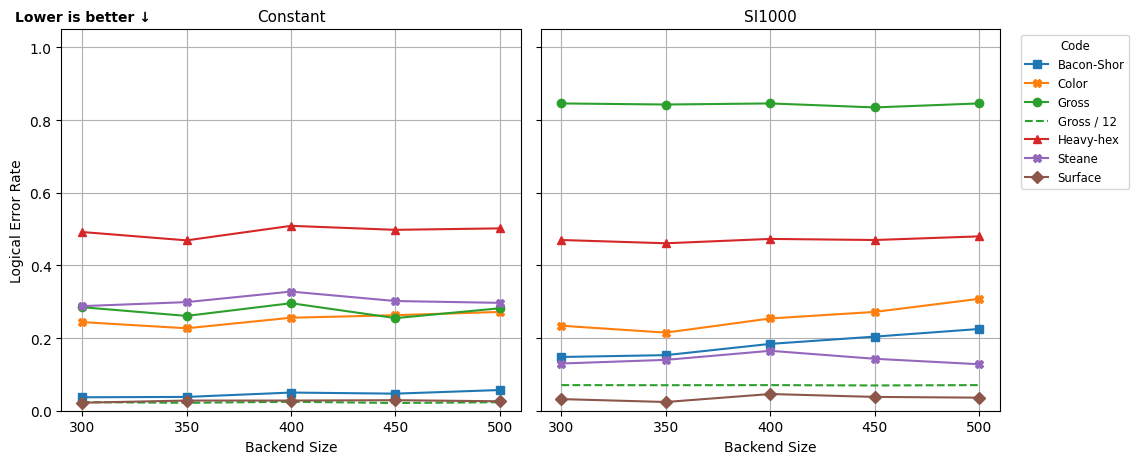

In [72]:
import matplotlib.pyplot as plt

# Error types and probabilities to show (with renamed labels)
error_types = ['Constant', 'SI1000']
error_probs = [0.004]

# Filter out heavyhex codes
df_filtered = df[~df['code'].str.contains('heavyhex', case=False, na=False)]
df_filtered = df_filtered[~df_filtered['backend'].str.contains('heavyhex', case=False, na=False)]

# Rename map for code labels
code_rename_map = {
    'bacon': 'Bacon-Shor',
    'hh': 'Heavy-hex',
    'gross': 'Gross'
}

# Rename map for error types (display name -> internal name in DataFrame)
error_type_map = {
    'Constant': 'constant',
    'SI1000': 'modsi1000'
}

# Marker styles for different codes
marker_styles = {
    'gross': 'o',
    'bacon': 's',      # square
    'hh': '^',         # triangle up
    'surface': 'D',    # diamond
    'other': 'X'       # fallback marker
}

# Get unique backends
backends = df_filtered['backend'].unique()

for backend in backends:
    n_rows = 1
    n_cols = len(error_probs) * len(error_types)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5), sharey=True)

    if n_cols == 1:
        axes = [axes]

    all_handles_labels = []

    for idx, (i, p) in enumerate(enumerate(error_probs)):
        for j, et in enumerate(error_types):
            ax = axes[idx * len(error_types) + j]
            original_et = error_type_map.get(et, et.lower())

            subset = df_filtered[
                (df_filtered['backend'] == backend) &
                (df_filtered['error_type'] == original_et) &
                (df_filtered['error_probability'] == p)
            ]

            for code, group in subset.groupby('code'):
                code_key = code.lower()
                code_display = code_rename_map.get(code_key, code.capitalize())
                marker = marker_styles.get(code_key, marker_styles['other'])

                group_sorted = group.sort_values('backend_size')

                line = ax.plot(
                    group_sorted['backend_size'],
                    group_sorted['logical_error_rate'],
                    label=code_display,
                    marker=marker
                )

                if code_key == 'gross':
                    line_color = line[0].get_color()
                    gross_div12 = group_sorted['logical_error_rate'] / 12
                    ax.plot(
                        group_sorted['backend_size'],
                        gross_div12,
                        linestyle='--',
                        color=line_color,
                        label='Gross / 12'
                    )

            ax.set_xlabel('Backend Size')
            xticks = sorted(subset['backend_size'].unique())
            ax.set_xticks(xticks)

            ax.set_title(f'{et}', fontsize=11)

            if idx == 0 and j == 0:
                ax.set_ylabel('Logical Error Rate')
                ax.text(-0.1, 1.05, 'Lower is better ↓', transform=ax.transAxes,
                        fontsize=10, fontweight='bold', va='top', ha='left')

            ax.grid(True)
            ax.set_ylim(0, 1.05)

            # Collect legend info
            handles, labels = ax.get_legend_handles_labels()
            all_handles_labels.extend(zip(handles, labels))

    # Deduplicate legend entries
    unique_labels = {}
    for h, l in all_handles_labels:
        if l not in unique_labels:
            unique_labels[l] = h

    fig.legend(
        handles=list(unique_labels.values()),
        labels=list(unique_labels.keys()),
        title='Code',
        fontsize='small',
        title_fontsize='small',
        loc='upper right',
        bbox_to_anchor=(0.95, 0.88)
    )

    plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # leave space for legend
    plt.savefig(f"../data/size/full.png")
    plt.show()


In [85]:
df = pd.read_csv('../experiment_results/Topology_size_full_18.06/results.csv')
dfhh = pd.read_csv('../experiment_results/Topology_size_hh_15.06/results.csv')
df_combined = pd.concat([df, dfhh], ignore_index=True)

In [87]:
dfhh

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_heavyhex,114,bacon,bposd,7,7,1000,constant,0.002,0.021,NaN,NaN,NaN
1,custom_heavyhex,114,bacon,bposd,7,7,1000,modsi1000,0.002,0.036,NaN,NaN,NaN
2,custom_heavyhex,114,bacon,bposd,7,7,1000,constant,0.004,0.094,NaN,NaN,NaN
3,custom_heavyhex,114,bacon,bposd,7,7,1000,modsi1000,0.004,0.152,NaN,NaN,NaN
4,custom_heavyhex,114,bacon,bposd,7,7,1000,modsi1000,0.008,0.358,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.008,0.497,NaN,NaN,NaN
158,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.002,0.485,NaN,NaN,NaN
159,custom_heavyhex,546,color,bposd,13,13,1000,constant,0.004,0.501,NaN,NaN,NaN
160,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.004,0.494,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt

# Error types and probabilities to show (with renamed labels)
error_types = ['Constant', 'SI1000']
error_probs = [0.004]

# Filter out full connectivity codes
df_filtered = dfhh

# Rename map for code labels
code_rename_map = {
    'bacon': 'Bacon-Shor',
    'hh': 'Heavy-hex',
    'gross': 'Gross'
}

# Rename map for error types (display name -> internal name in DataFrame)
error_type_map = {
    'Constant': 'constant',
    'SI1000': 'modsi1000'
}

# Marker styles for different codes
marker_styles = {
    'gross': 'o',
    'bacon': 's',
    'hh': '^',
    'surface': 'D',
    'other': 'X'
}

# Get unique backends
backends = df_filtered['backend'].unique()

for backend in backends:
    n_rows = 1
    n_cols = len(error_probs) * len(error_types)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5), sharey=True)

    # Normalize axes to flat list
    if isinstance(axes, plt.Axes):  # Single plot
        axes = [axes]
    else:
        axes = axes.flatten()

    all_handles_labels = []

    for idx, (i, p) in enumerate(enumerate(error_probs)):
        for j, et in enumerate(error_types):
            ax = axes[idx * len(error_types) + j]

            original_et = error_type_map.get(et, et.lower())

            subset = df_filtered[
                (df_filtered['backend'] == backend) &
                (df_filtered['error_type'] == original_et) &
                (df_filtered['error_probability'] == p)
            ]

            for code, group in subset.groupby('code'):
                code_key = code.lower()
                code_display = code_rename_map.get(code_key, code.capitalize())
                marker = marker_styles.get(code_key, marker_styles['other'])

                group_sorted = group.sort_values('backend_size')

                ax.plot(
                    group_sorted['backend_size'],
                    group_sorted['logical_error_rate'],
                    label=code_display,
                    marker=marker
                )

            ax.set_xlabel('Backend Size')
            xticks = sorted(subset['backend_size'].unique())
            ax.set_xticks(xticks)

            ax.set_title(f'{et}', fontsize=11)

            if idx == 0 and j == 0:
                ax.set_ylabel('Logical Error Rate')
                ax.text(-0.1, 1.05, 'Lower is better ↓', transform=ax.transAxes,
                        fontsize=10, fontweight='bold', va='top', ha='left')

            ax.grid(True)
            ax.set_ylim(0, 1.05)

            handles, labels = ax.get_legend_handles_labels()
            all_handles_labels.extend(zip(handles, labels))

    # Deduplicate legend entries
    unique_labels = {}
    for h, l in all_handles_labels:
        if l not in unique_labels:
            unique_labels[l] = h

    fig.legend(
        handles=list(unique_labels.values()),
        labels=list(unique_labels.keys()),
        title='Code',
        fontsize='small',
        title_fontsize='small',
        loc='upper right',
        bbox_to_anchor=(0.95, 0.88)
    )

    plt.tight_layout(rect=[0, 0, 0.85, 0.95])
    plt.savefig(f"../data/size/hh.png")
    plt.show()


/tmp/ipykernel_201072/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_201072/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_201072/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_201072/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', 

FileNotFoundError: [Errno 2] No such file or directory: '/home/aswierkowska/eccentric_bench/data/Topology_size_27.05/mod_si_four_plots.png'

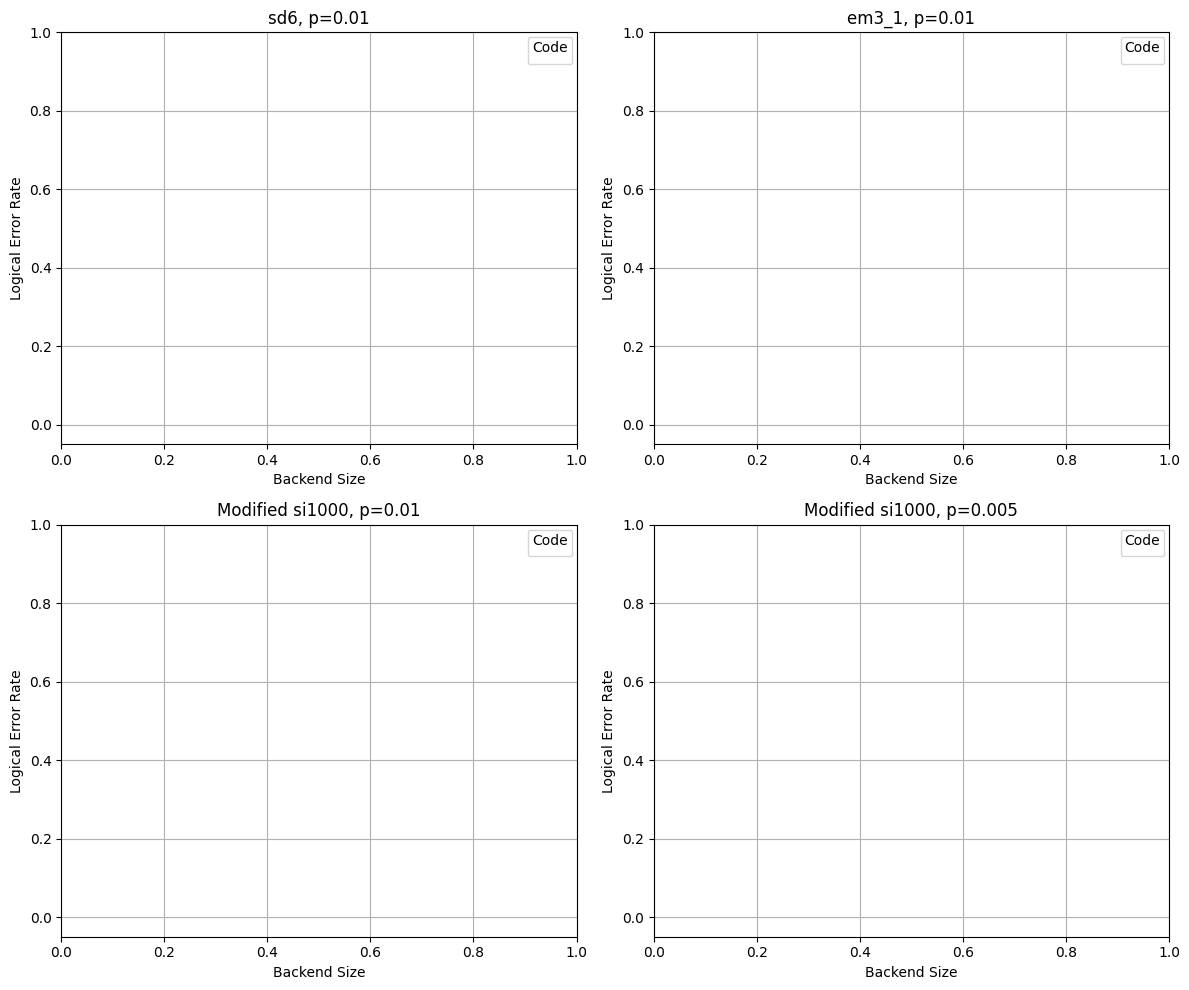

In [29]:
import matplotlib.pyplot as plt

# Define combinations of error type and error probability
plot_params = [
    ('sd6', 0.01),
    ('em3_1', 0.01),
    ('si1000', 0.01),
    ('si1000', 0.005)
]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index subplots

for idx, (et, p) in enumerate(plot_params):
    ax = axes[idx]
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    for code, group in subset.groupby('code'):
        group_sorted = group.sort_values('backend_size')
        ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                label=code, marker='o')
    if et == "si1000":
        et = "Modified si1000"
    ax.set_title(f'{et}, p={p}', fontsize=12)
    ax.set_xlabel('Backend Size')
    ax.set_ylabel('Logical Error Rate')
    ax.grid(True)
    ax.legend(title='Code', fontsize='x-small')
    ax.set_ylim(bottom=-0.05)

# Overall formatting
plt.tight_layout()
plt.savefig("../data/Topology_size_27.05/mod_si_four_plots.png")
plt.show()


In [15]:
df = pd.read_csv('../experiment_results/Topology_connectivity_31.05_20:45/results.csv')
print(df)
print("Total number of rows:", len(df))

         backend  backend_size   code decoder  distance  cycles  num_samples  \
0    custom_cube           729  gross   bposd       256       3         1000   
1    custom_cube           729  gross   bposd       256       3         1000   
2    custom_grid           729  gross   bposd       364       3         1000   
3    custom_cube           729  gross   bposd       256       3         1000   
4    custom_cube           729  gross   bposd       256       3         1000   
..           ...           ...    ...     ...       ...     ...          ...   
211  custom_line           729  color   bposd        17       3         1000   
212  custom_line           729  color   bposd        17       3         1000   
213  custom_grid           729  color   bposd        17       3         1000   
214  custom_grid           729  color   bposd        17       3         1000   
215  custom_grid           729  color   bposd        17       3         1000   

    error_type  error_probability  logi

In [ ]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,729,steane,bposd,27,3,1000,em3_1,0.010,0.000,NaN,NaN,NaN
1,custom_full,729,gross,bposd,364,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
2,custom_full,729,gross,bposd,364,3,1000,em3_2,0.010,0.000,NaN,NaN,NaN
3,custom_full,729,steane,bposd,27,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
4,custom_full,729,gross,bposd,364,3,1000,em3_2,0.015,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,custom_full,729,hh,bposd,17,3,1000,sd6,0.010,0.481,NaN,NaN,NaN
59,custom_full,729,hh,bposd,17,3,1000,sd6,0.015,0.464,NaN,NaN,NaN
60,custom_full,729,color,bposd,17,3,1000,sd6,0.010,0.391,NaN,NaN,NaN
61,custom_full,729,color,bposd,17,3,1000,sd6,0.050,0.498,NaN,NaN,NaN


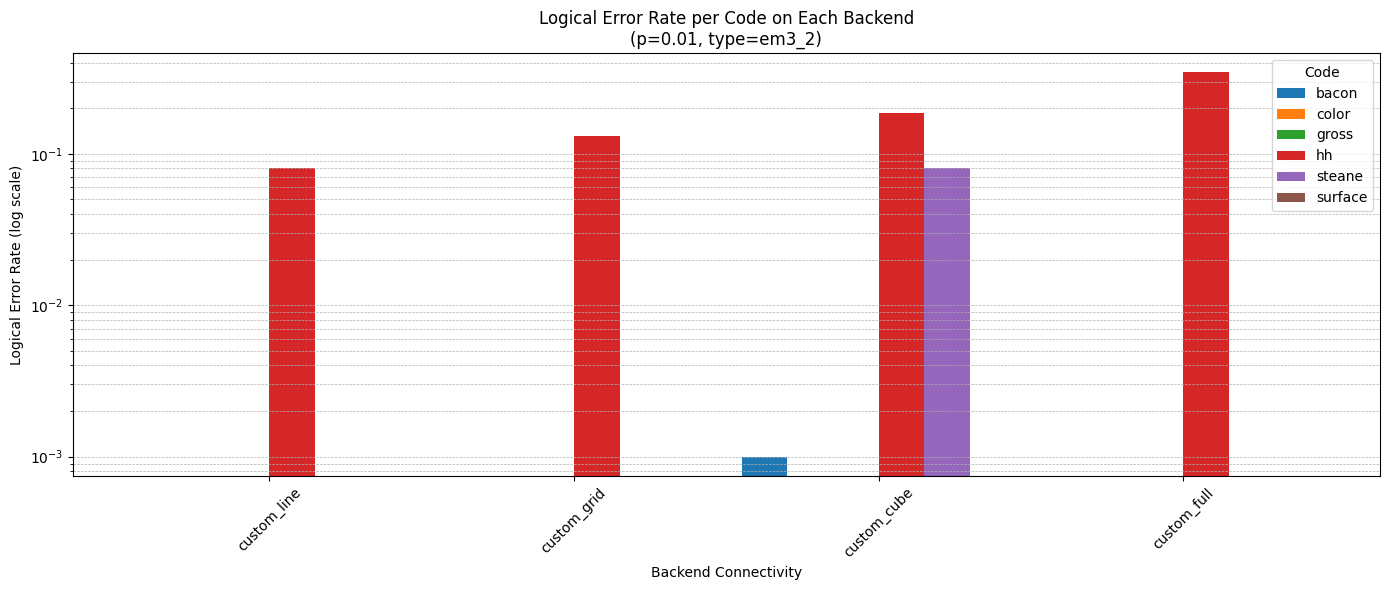

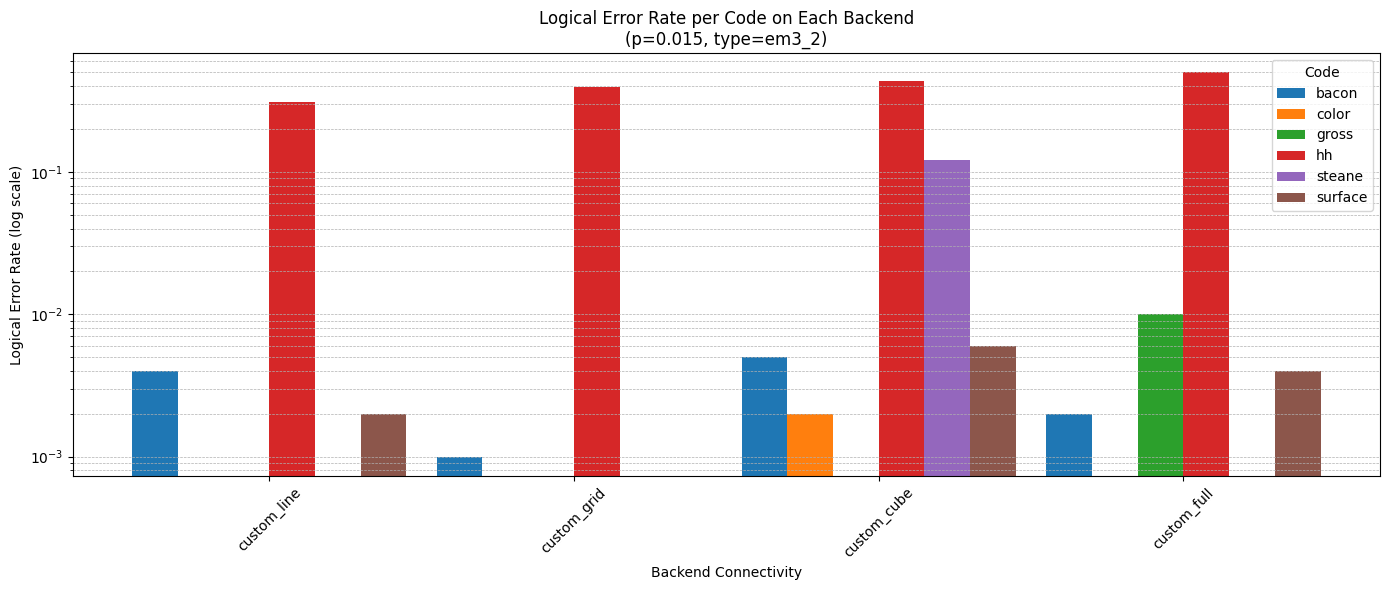

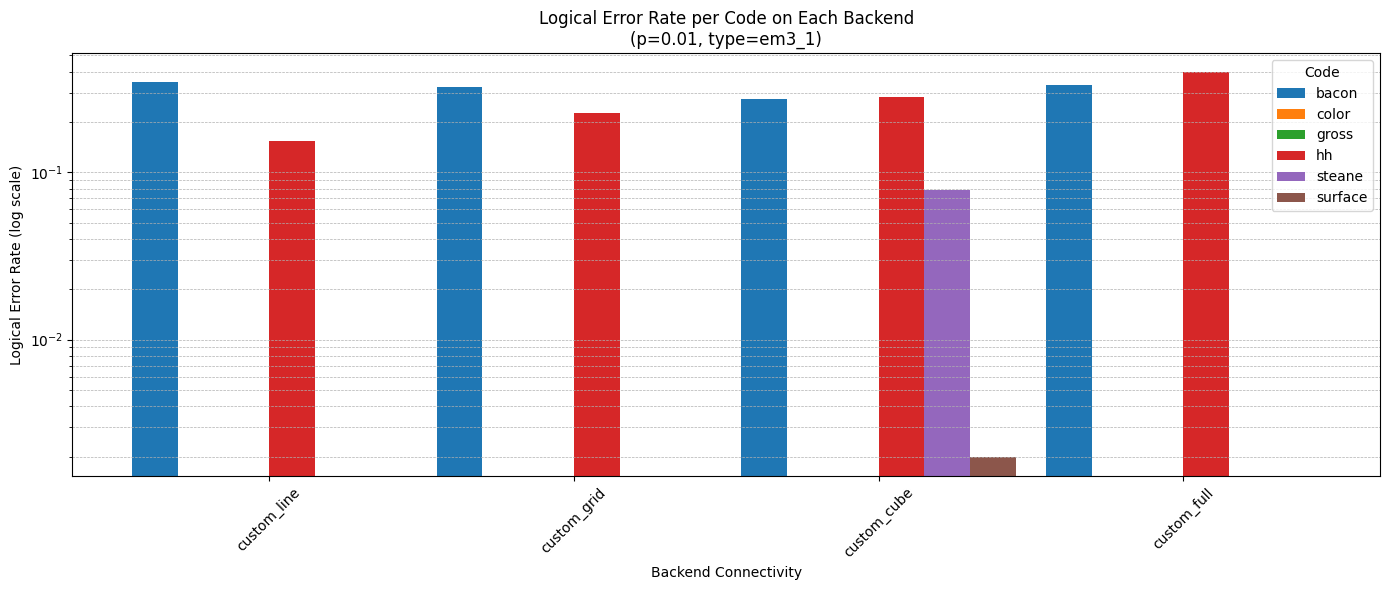

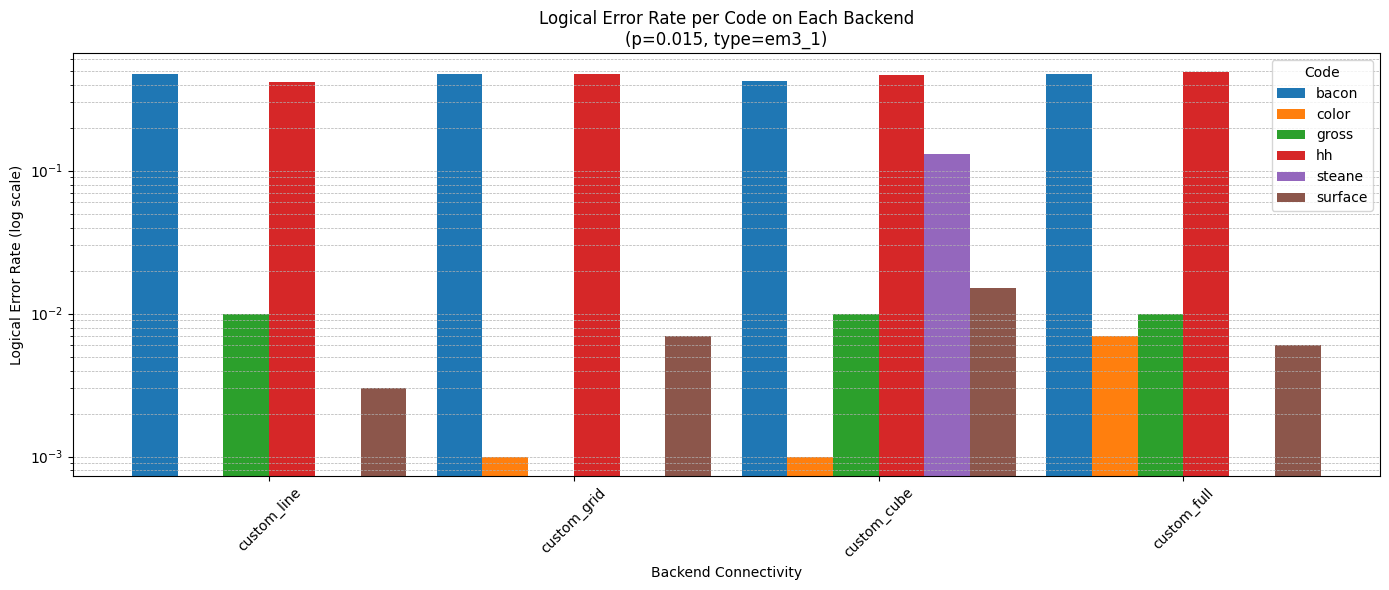

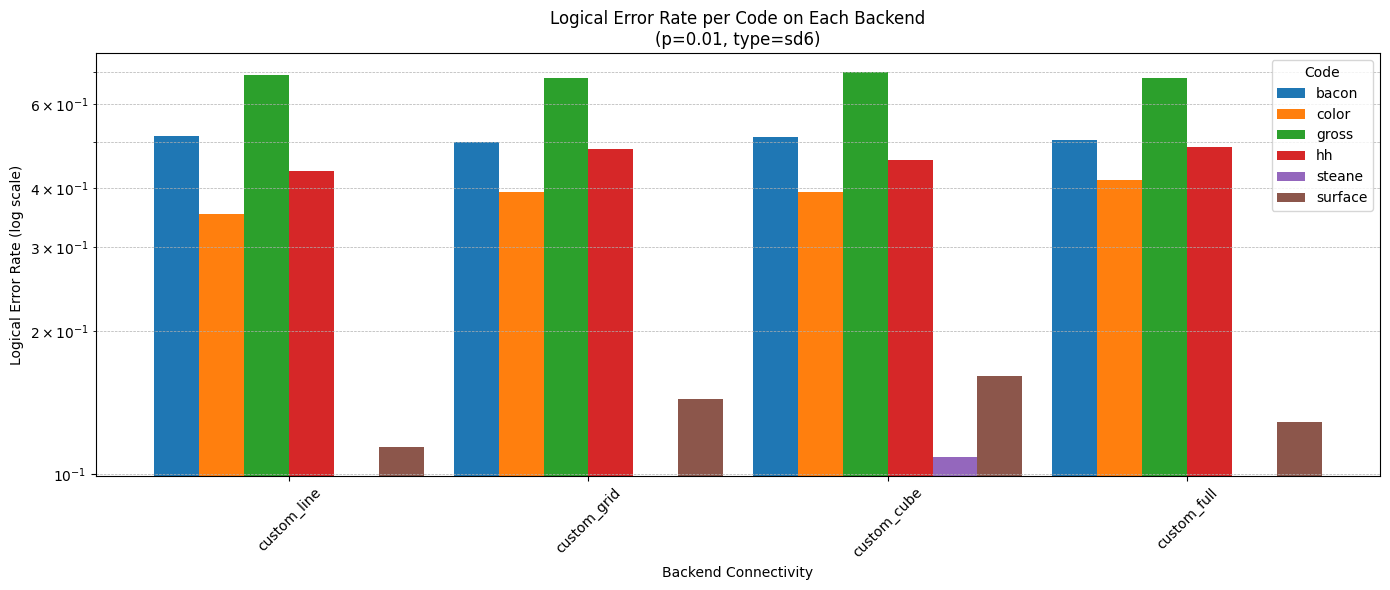

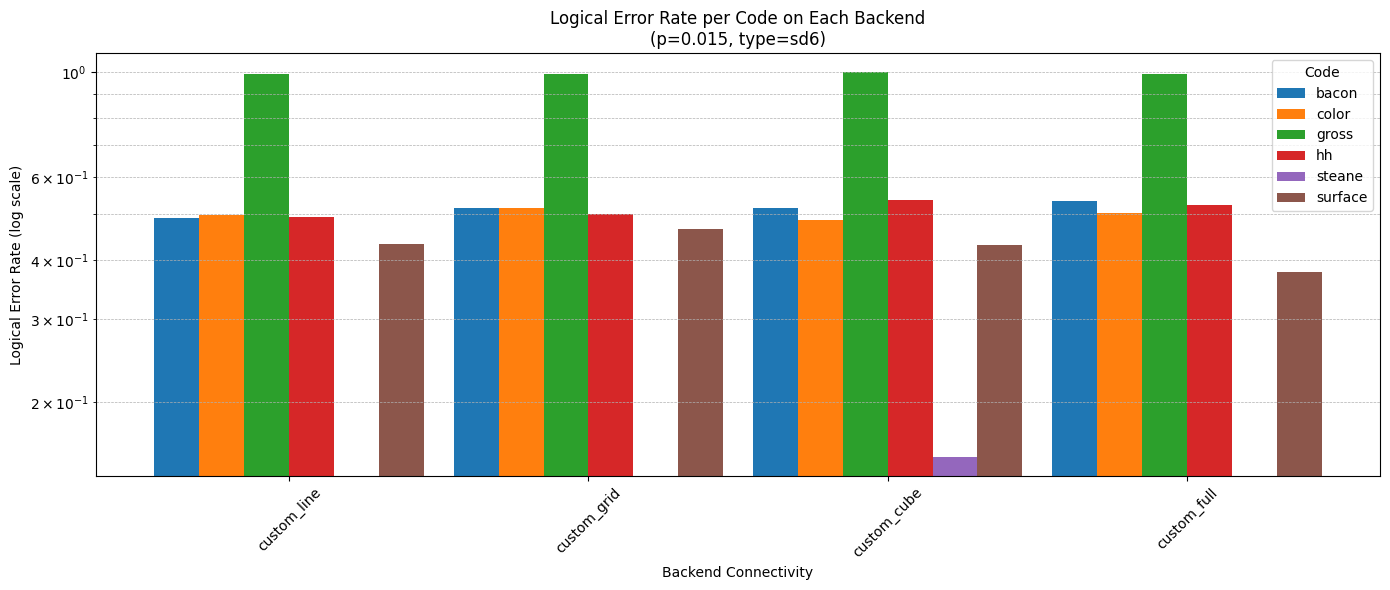

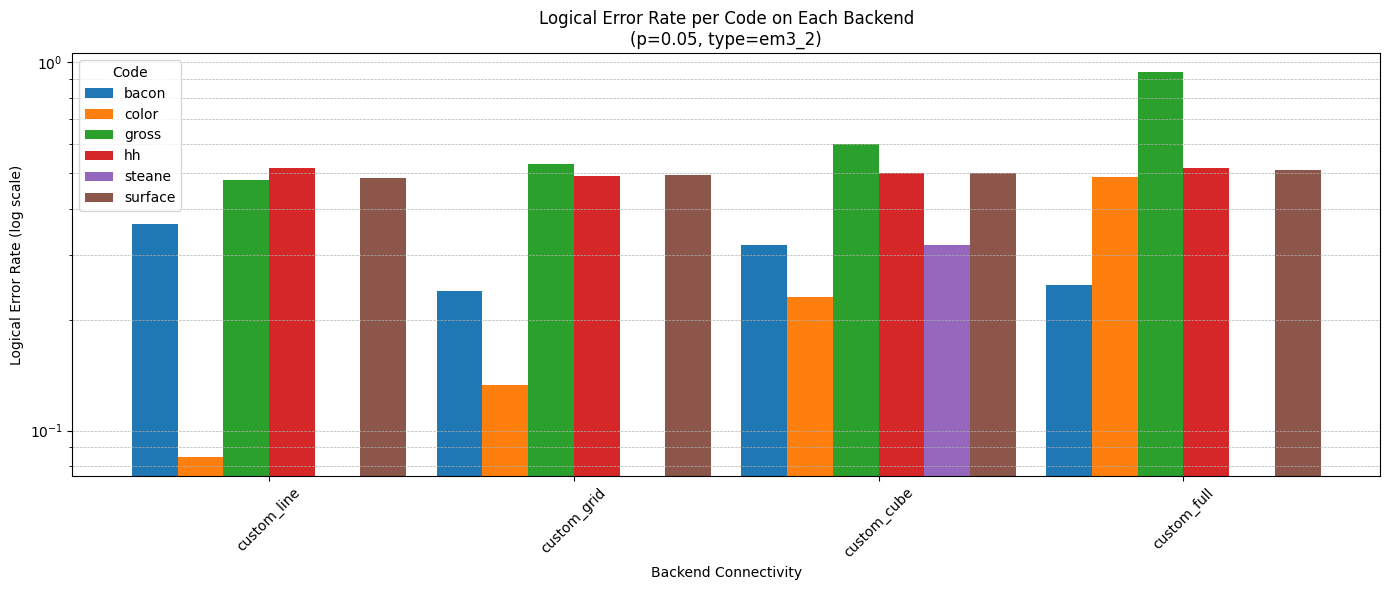

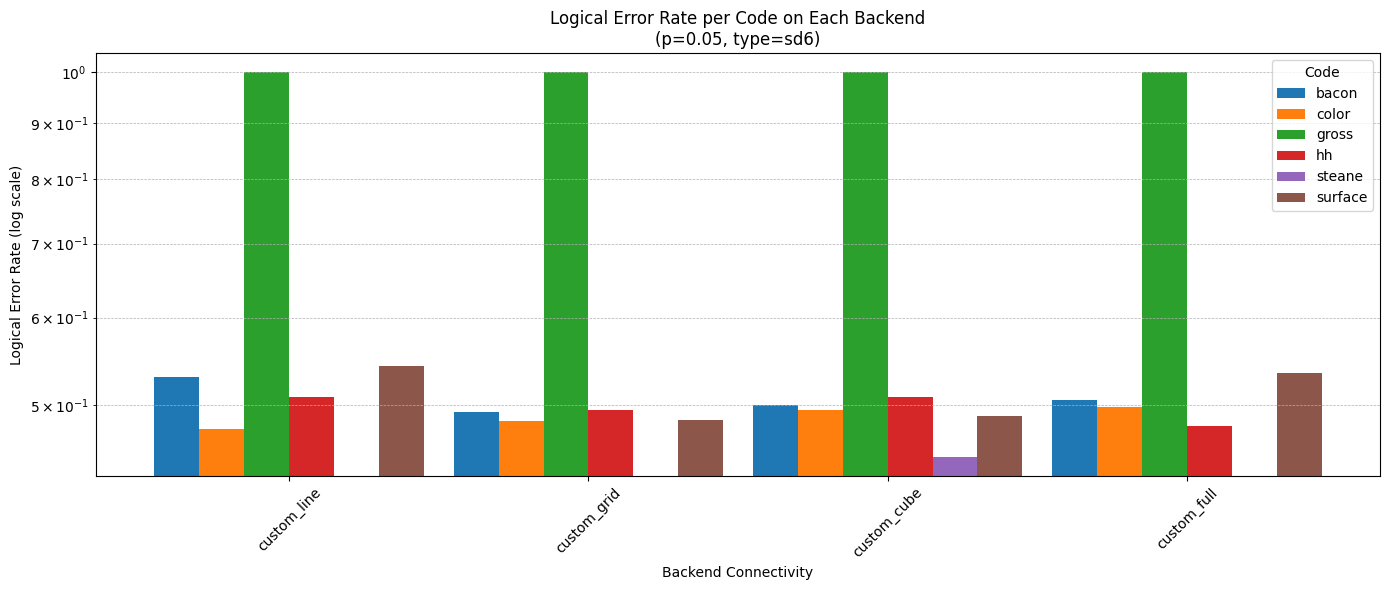

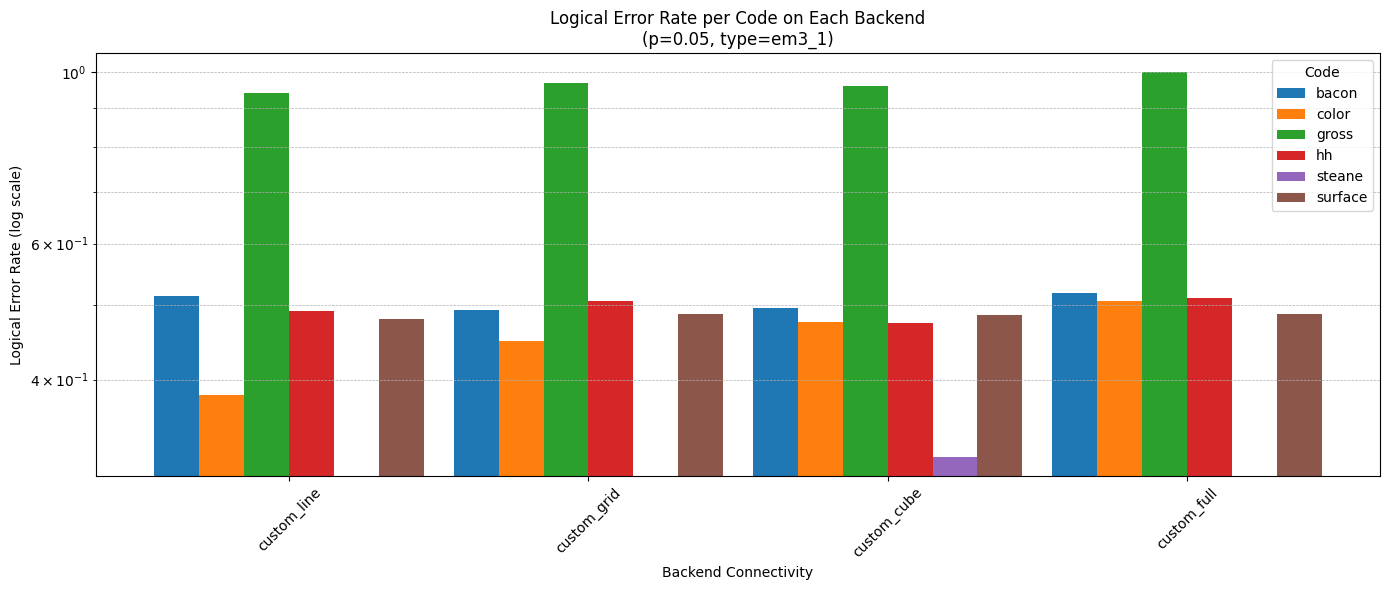

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom backend order
custom_order = ['custom_line', 'custom_grid', 'custom_cube', 'custom_full']

# Get all unique combinations of error_probability and error_type
combinations = df[['error_probability', 'error_type']].drop_duplicates()

# Loop through each combination
for _, row in combinations.iterrows():
    p = row['error_probability']
    et = row['error_type']

    # Filter the subset
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    # Create pivot table and reindex
    pivot_df = subset.pivot_table(index='backend', columns='code', values='logical_error_rate', aggfunc='mean')
    pivot_df = pivot_df.reindex(custom_order)

    # Skip empty or invalid plots
    if pivot_df.dropna(how='all').empty:
        continue

    # Prepare plot data
    backends = pivot_df.index
    codes = pivot_df.columns
    x = np.arange(len(backends))
    width = 0.15

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 6))
    for i, code in enumerate(codes):
        ax.bar(x + i * width, pivot_df[code], width, label=code)

    # Formatting
    ax.set_yscale('log')  # Logarithmic scale for error rate
    ax.set_xlabel('Backend Connectivity')
    ax.set_ylabel('Logical Error Rate (log scale)')
    ax.set_title(f'Logical Error Rate per Code on Each Backend\n(p={p}, type={et})')
    ax.set_xticks(x + width * (len(codes) - 1) / 2)
    ax.set_xticklabels(backends, rotation=45)
    ax.legend(title='Code')
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    # Optional: save to file
    # plt.savefig(f"barplot_{et}_p{str(p).replace('.', '')}.png")
    plt.show()


In [2]:
import pandas as pd
df_decoders = pd.read_csv("../experiment_results/test_decoders/results.csv")

In [5]:
df_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
5,bacon,bposd_faster,0.040
11,bacon,bposd_gross,0.043
16,color,bposd_gross,0.249
4,color,mwpm,0.504
10,color,bposd_faster,0.296
13,gross,bposd_gross,0.269
7,gross,bposd_faster,0.304
14,hh,bposd_gross,0.447
8,hh,bposd_faster,0.462


In [3]:
best_decoders = df_decoders.loc[df_decoders.groupby("code")["logical_error_rate"].idxmin()]
best_decoders = best_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")
display(best_decoders)

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
16,color,bposd_gross,0.249
13,gross,bposd_gross,0.269
14,hh,bposd_gross,0.447
12,steane,bposd_gross,0.124
15,surface,bposd_gross,0.021
